In [15]:
!pip install ydata-profiling

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
from ydata_profiling import ProfileReport
import warnings
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [7]:
data = pd.read_csv("/Users/ansilin/Documents/my_works/edu_project_taiwan/data/Prediction_datasetcsv.csv")

In [8]:
data.head()

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,Role
0,4.0,4.0,4.0,4.0,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,Database Administrator
1,5.0,4.0,4.0,4.0,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,Database Administrator
2,1.0,4.0,4.0,4.0,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,Database Administrator
3,0.0,4.0,4.0,4.0,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,Database Administrator
4,3.0,4.0,4.0,4.0,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,Database Administrator


In [10]:
print(data.columns)

Index(['Computer Architecture', 'Programming Skills', 'Project Management',
       'Communication skills', 'Openness', 'Conscientousness', 'Extraversion',
       'Agreeableness', 'Emotional_Range', 'Conversation',
       'Openness to Change', 'Hedonism', 'Self-enhancement',
       'Self-transcendence', 'Role'],
      dtype='object')


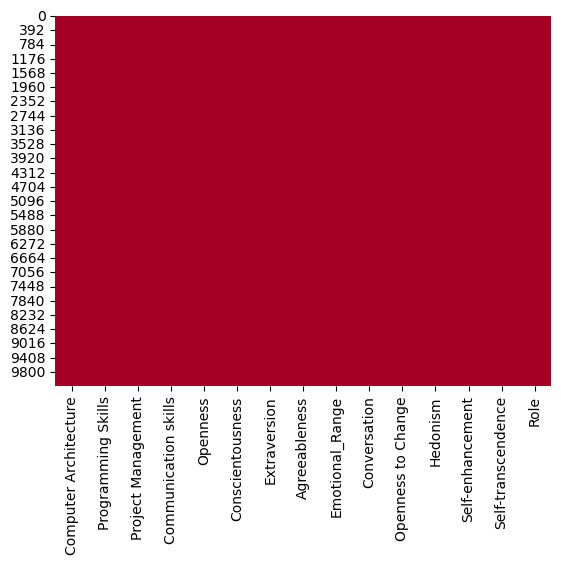

In [13]:
# Ensure the plot appears inline in the notebook
%matplotlib inline
# Plot the heatmap showing missing values in your dataset
sns.heatmap(data.isnull(), cmap="RdYlGn", cbar=False)

# Display the plot
plt.show()

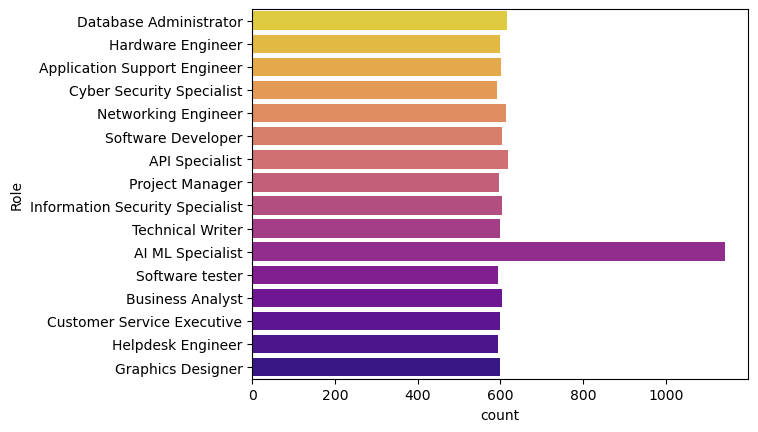

In [16]:
# Plot the countplot showing the distribution of 'Role' in your dataset
sns.countplot(y='Role', data=data, palette="plasma_r")

# Display the plot (Colab generally handles inline rendering, but this ensures it works)
plt.show()

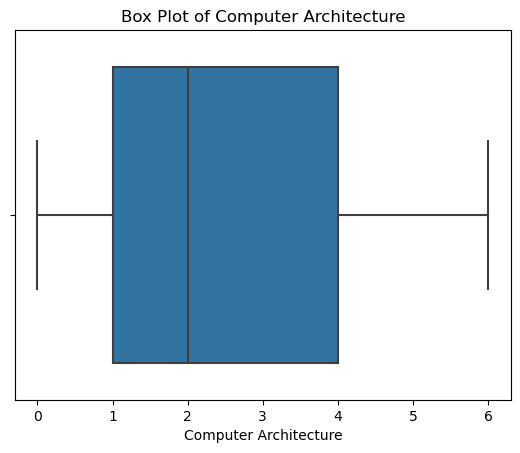

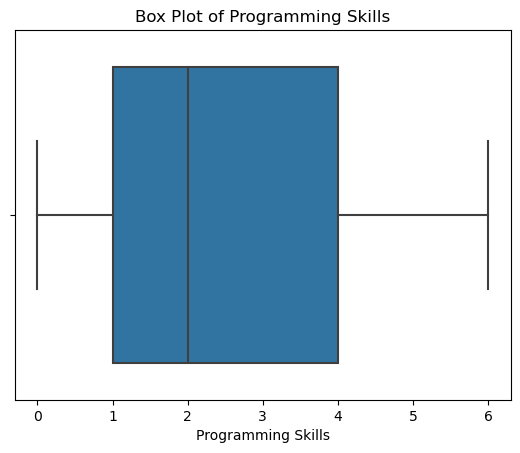

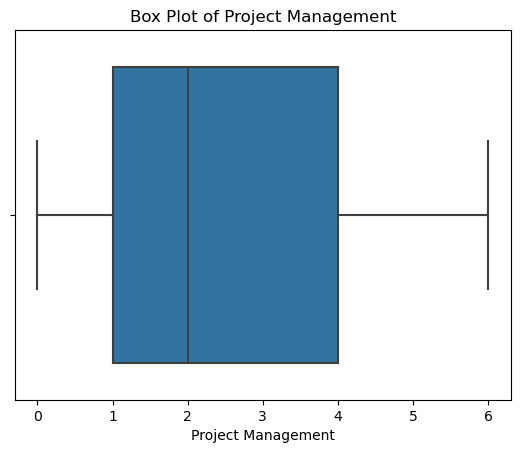

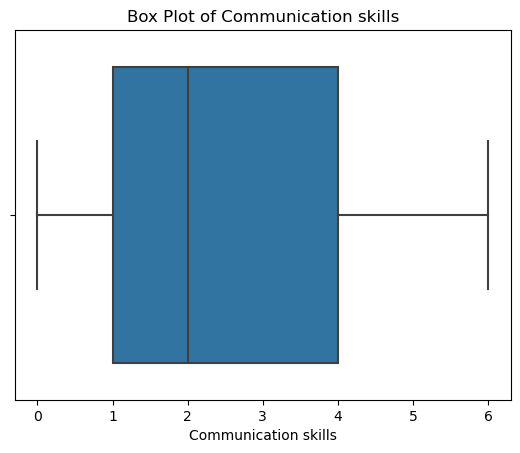

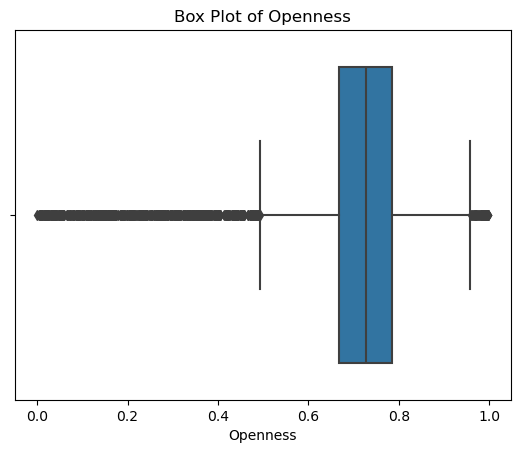

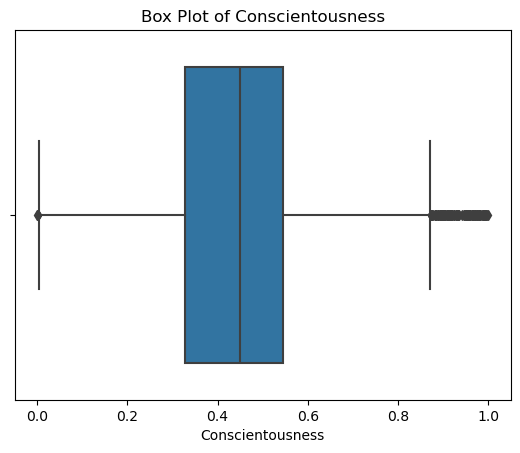

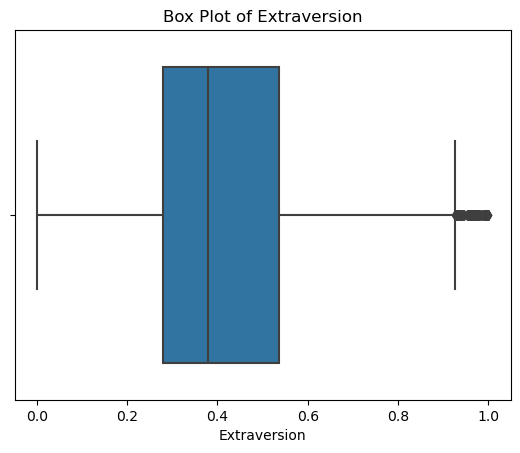

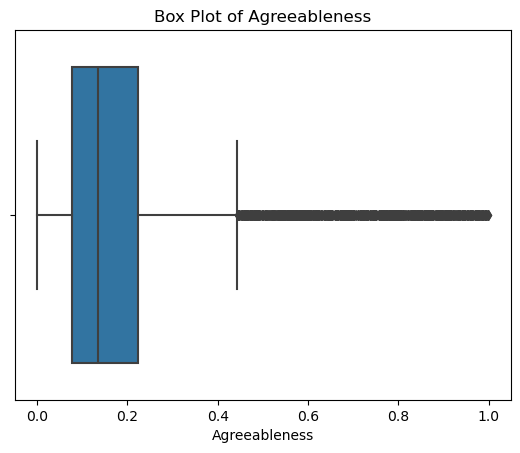

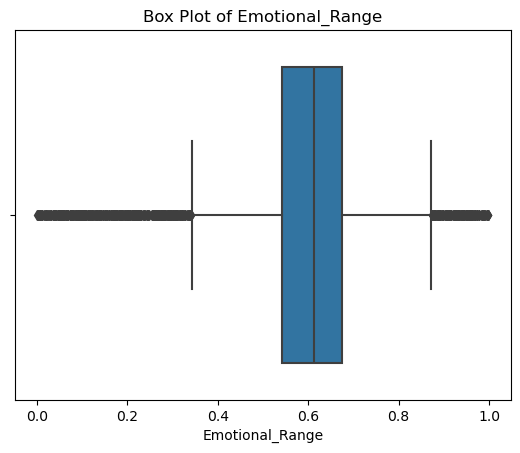

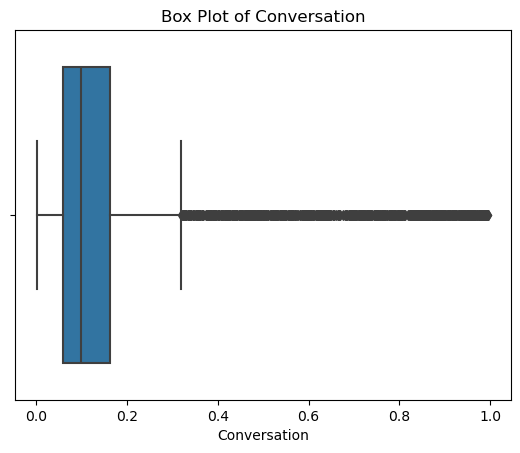

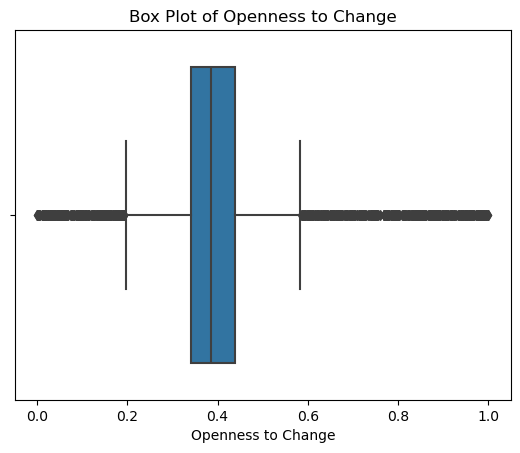

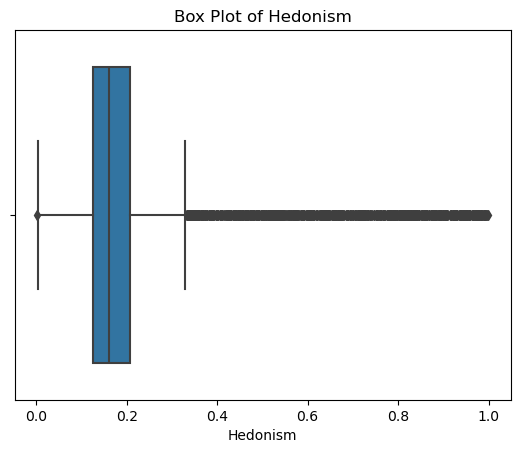

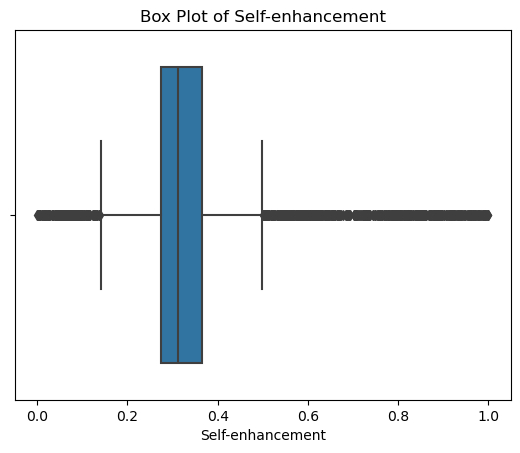

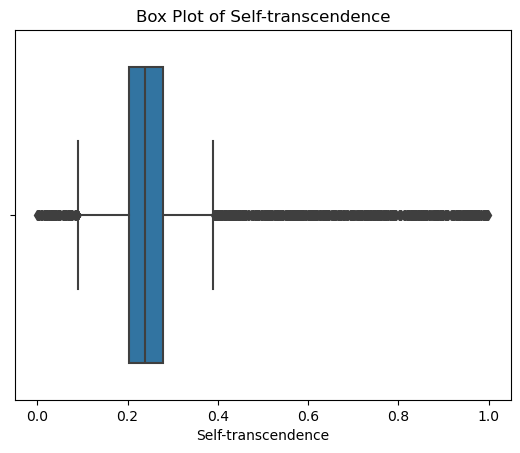

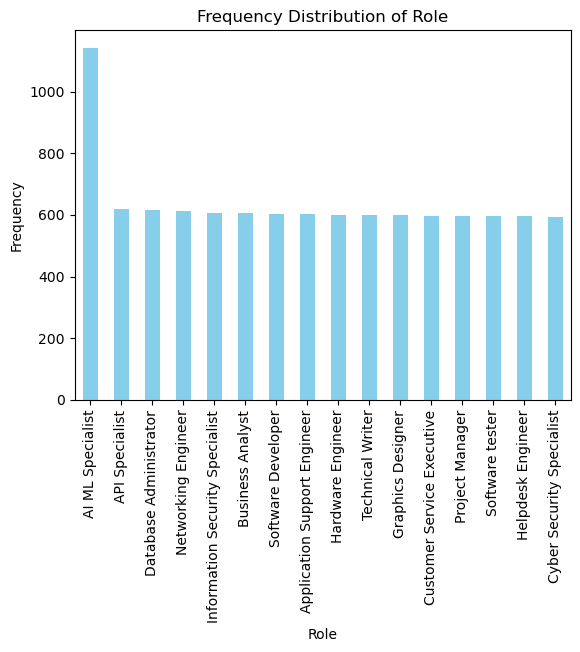

In [17]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()

# 2. Check outliers for numerical columns using box plots
for col in numerical_cols:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.show()  # Display the plot explicitly in Google Colab

# 3. Check outliers for categorical columns using frequency analysis
for col in categorical_cols:
    plt.figure()  # Create a new figure for each frequency plot
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()  # Display the plot explicitly in Google Colab

In [ ]:
cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH Value', 'Rainfall']

from feature_engine.outliers.winsorizer import Winsorizer

winsorizer = Winsorizer(capping_method ='iqr',
                       tail='both',
                       fold=1.5
                       )

for i in cols:
    c_t = winsorizer.fit_transform(crops[[i]])

    winsorizer.left_tail_caps_, winsorizer.right_tail_caps_

    plt.boxplot(c_t[i]);plt.title(i);plt.show()

In [18]:
cp = data.Role.astype('category')
targets = dict(enumerate(cp.cat.categories))
data['Role'] = cp.cat.codes

y = data.Role
x = data[['Computer Architecture', 'Programming Skills', 'Project Management',
       'Communication skills', 'Openness', 'Conscientousness', 'Extraversion',
       'Agreeableness', 'Emotional_Range', 'Conversation',
       'Openness to Change', 'Hedonism', 'Self-enhancement',
       'Self-transcendence']]


In [19]:
#future scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 1)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = scaler.transform(x_test)

In [20]:
#modeling
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators = 100,random_state = 42).fit(x_train, y_train)

print('Random Forest accuracy on training set : {:.2f}'.format(clf.score(x_train,y_train)))
print('Random Forest accuracy on test set : {:.2f}'.format(clf.score(x_test, y_test)))

Random Forest accuracy on training set : 0.59
Random Forest accuracy on test set : 0.58


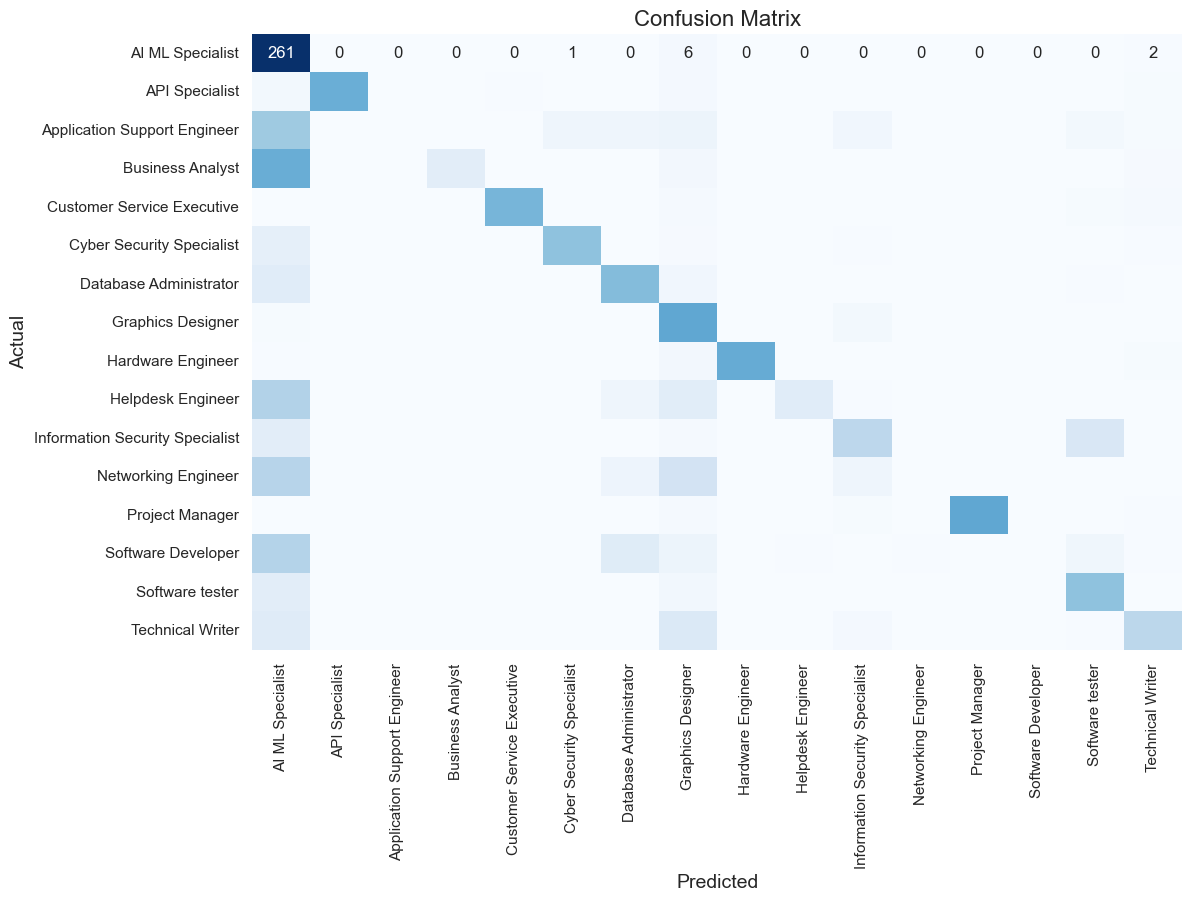

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
mat = confusion_matrix(y_test, clf.predict(x_test))

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(mat, index=targets.values(), columns=targets.values())

# Plot the heatmap for confusion matrix
plt.figure(figsize=(12, 8))  # Adjust size if needed
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues", cbar=False, annot_kws={"size": 12})

# Title and labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

plt.show()